In [1]:
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')


In [2]:
%store -r recent_sales

In [3]:
recent_sales.shape

(33508, 10)

In [4]:
recent_sales.head()

,Address,Suburb,Beds,Baths,Carpark,Type,Size,By,Price,Date
2,2 Lillyana St,Schofields Nsw 2762,4.0,3.0,1.0,House,500.2,Private Sale,1065000,2022-02-15
1,33/24 Walker St,Rhodes Nsw 2138,2.0,2.0,1.0,Apartment,0.0,Private Sale,801000,2022-02-15
4,7/1 Fewings St,Clovelly Nsw 2031,2.0,2.0,1.0,Townhouse,0.0,Auction,1520000,2022-02-15
5,127/25 Best St,Lane Cove Nsw 2066,3.0,1.0,1.0,Apartment,0.0,Private Sale,1450000,2022-02-15
0,4/97 The Blvde,Wiley Park Nsw 2195,2.0,1.0,1.0,Apartment,0.0,Private Sale,462000,2022-02-15


In [5]:
recent_sales['Price'] = recent_sales['Price'].astype(int)

## Budget, Bedrooms, Bathrooms, Time Period

In [6]:
# Budget

wan_min = 65
wan_max = 100
'''
it's a chinese numeric thing.
Unlike in English speaking countries where people count numbers in 3: 1 million is 1,000,000 ,
Chinese devide numbers in 4 digits: 1 million is 100,0000
1"wan" means 10000, or 10K. 1 million is 100 "wan"
'''
budget_max = wan_max*10000
budget_min = wan_min*10000

# Beds, Baths

beds = 2
baths = 2

# Time Period

last_months = 12

d_date = date.today() + relativedelta(months= -last_months)  # within 12 months
d_date = d_date.strftime("%m/%d/%y")


In [7]:
properties = recent_sales[
    (recent_sales["Price"] >= budget_min) &
    (recent_sales["Price"] <= budget_max) &
    (recent_sales["Beds"] >= beds) &
    (recent_sales["Baths"] >= baths) &
    (recent_sales["Date"] >= d_date)
]


## Target Suburbs

In [8]:
hot_threshold = 25

suburbs = properties.Suburb.unique()
print("all suburbs in the dataframe:" ,len(suburbs))

grp_suburbs = properties.groupby(["Suburb"]).size()
hot_suburbs=grp_suburbs[grp_suburbs>hot_threshold]
print("hot suburbs:", len(hot_suburbs))

all suburbs in the dataframe: 495
hot suburbs: 42


In [9]:
# use this if specific suburbs


# places = [
#     'Ryde Nsw 2112',
#     'West Ryde Nsw 2114',
#     'North Ryde',
#     'Macquarie Park',
#     'Eastwood',
#     'Meadowbank',
#     'Rhodes Nsw 2138',
#     'Castle Hill Nsw',
#     'Waitara',
#     'Hornsby',
#     'Chatswood',
#     'Beecroft',
#     'Zetland Nsw 2017',
# ]



places = hot_suburbs.index


Asquith Nsw 2077 :
Properties: 32 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


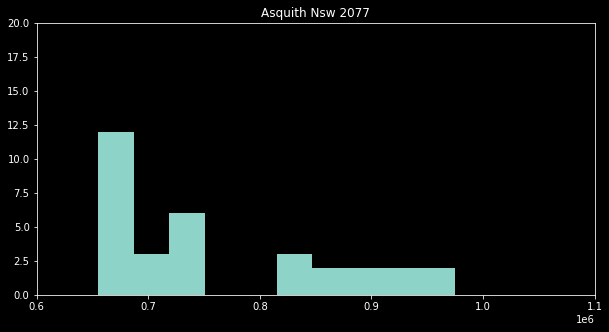

Auburn Nsw 2144 :
Properties: 33 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


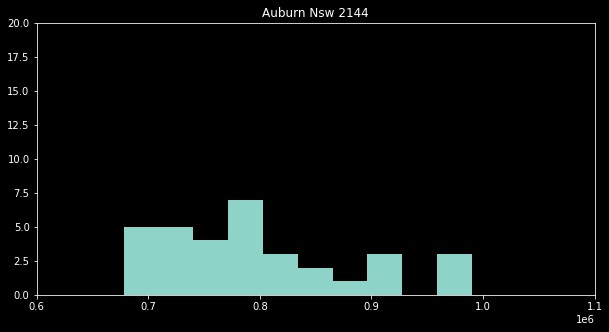

Baulkham Hills Nsw 2153 :
Properties: 47 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


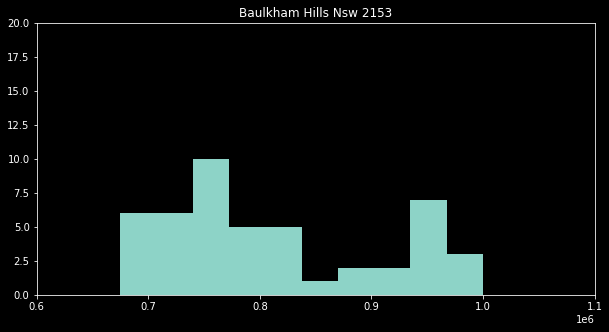

Blacktown Nsw 2148 :
Properties: 112 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


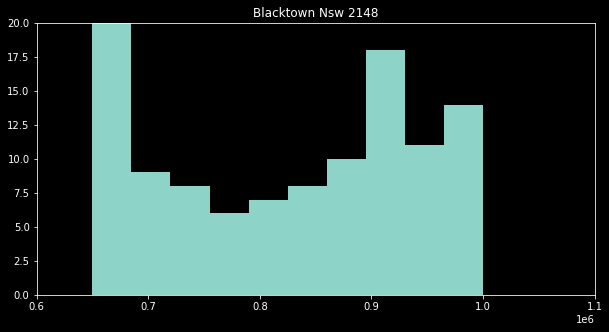

Bradbury Nsw 2560 :
Properties: 31 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


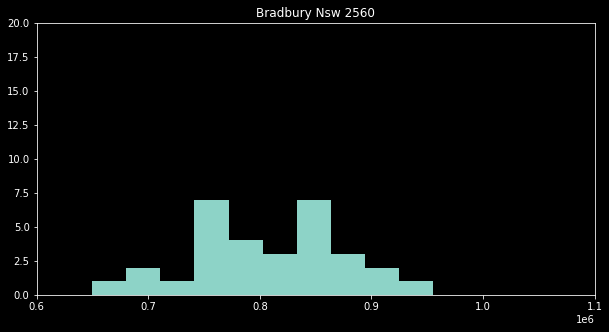

Burwood Nsw 2134 :
Properties: 66 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


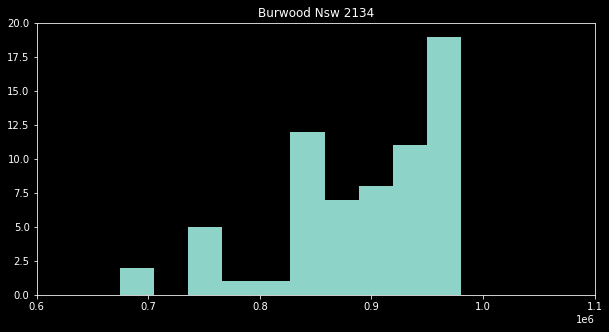

Campsie Nsw 2194 :
Properties: 35 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


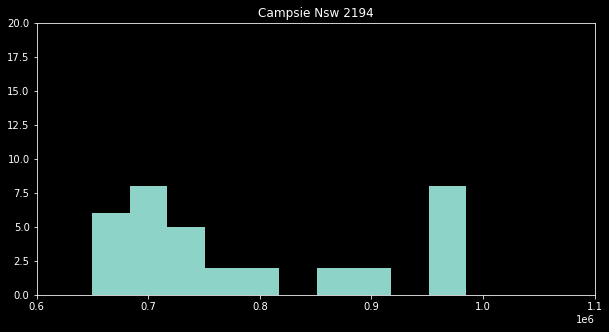

Caringbah Nsw 2229 :
Properties: 33 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


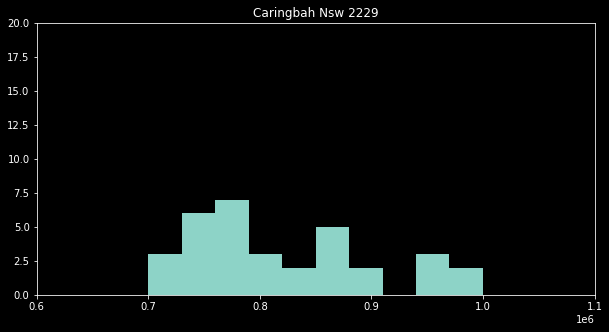

Carlingford Nsw 2118 :
Properties: 42 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


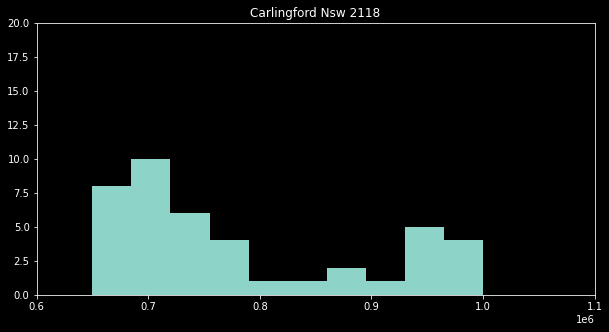

Castle Hill Nsw 2154 :
Properties: 29 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


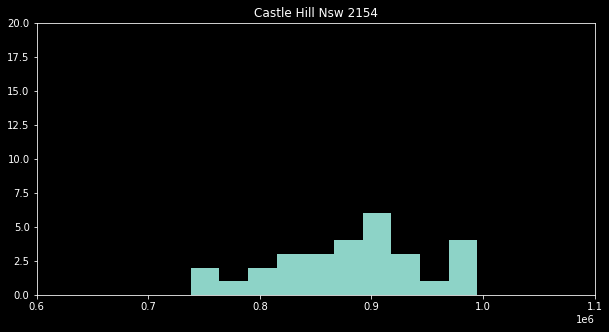

Casula Nsw 2170 :
Properties: 32 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


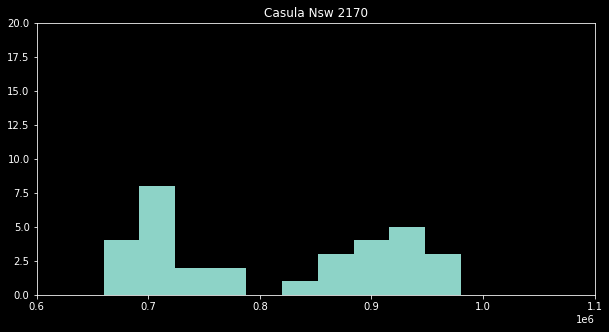

Cranebrook Nsw 2749 :
Properties: 43 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


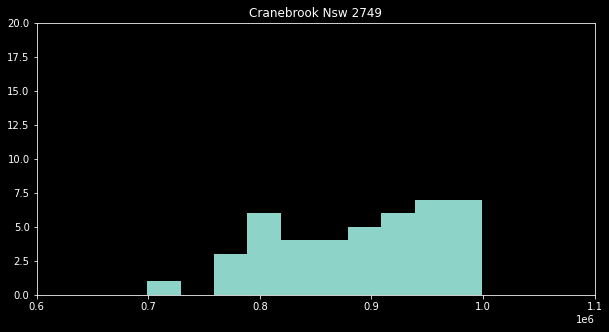

Epping Nsw 2121 :
Properties: 51 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


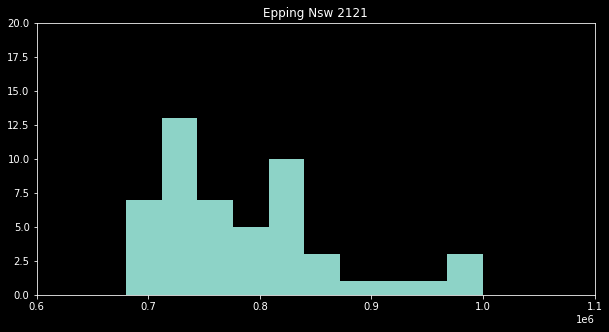

Gladesville Nsw 2111 :
Properties: 26 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


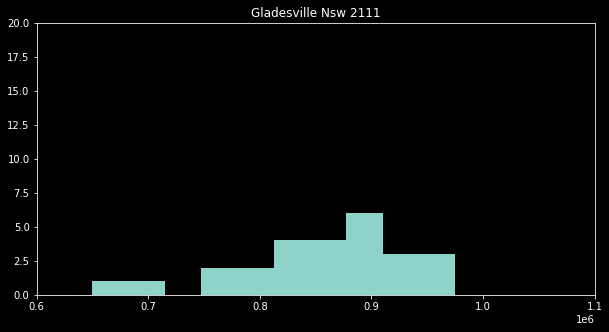

Glenmore Park Nsw 2745 :
Properties: 54 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


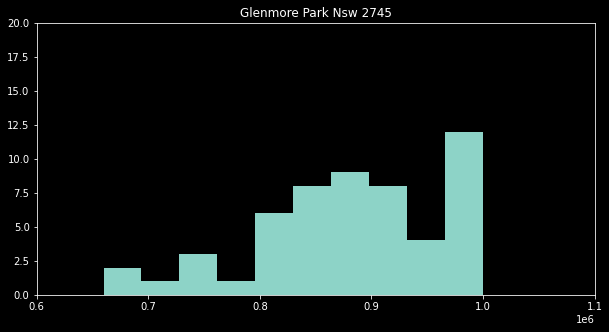

Greenacre Nsw 2190 :
Properties: 30 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


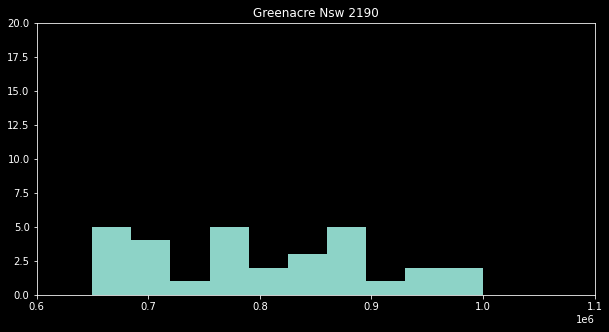

Hornsby Nsw 2077 :
Properties: 55 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


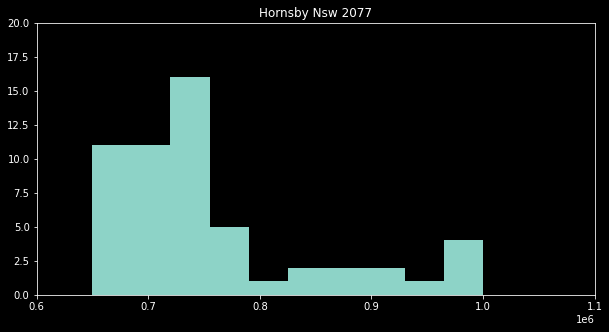

Hurstville Nsw 2220 :
Properties: 40 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


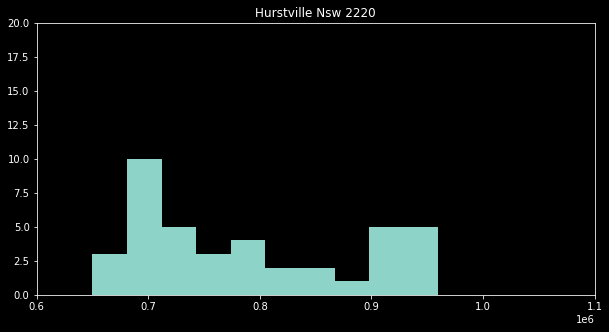

Ingleburn Nsw 2565 :
Properties: 32 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


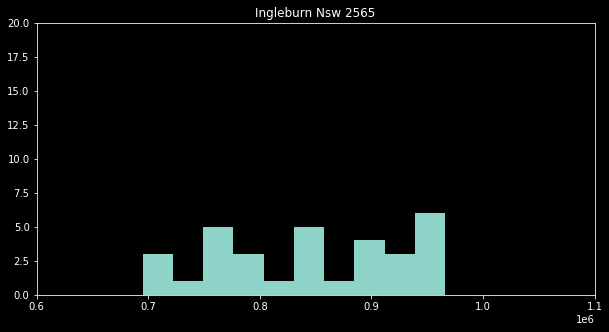

Jordan Springs Nsw 2747 :
Properties: 52 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


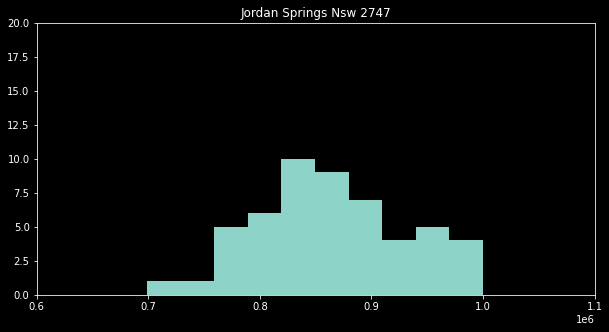

Lidcombe Nsw 2141 :
Properties: 27 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


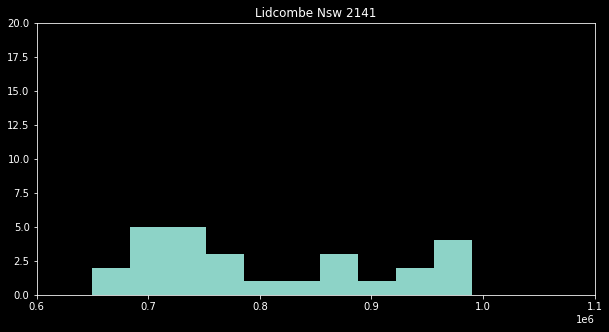

Mount Annan Nsw 2567 :
Properties: 32 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


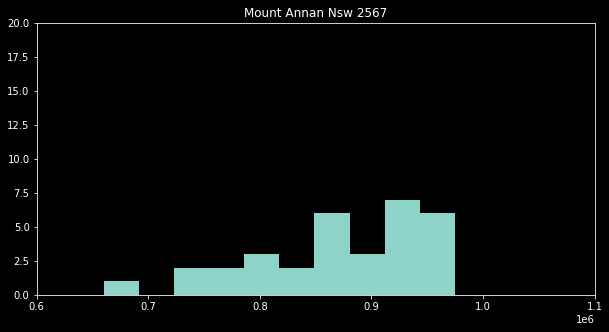

Parramatta Nsw 2150 :
Properties: 49 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


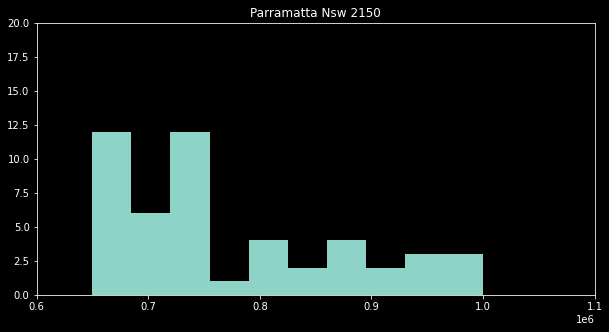

Penrith Nsw 2750 :
Properties: 62 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


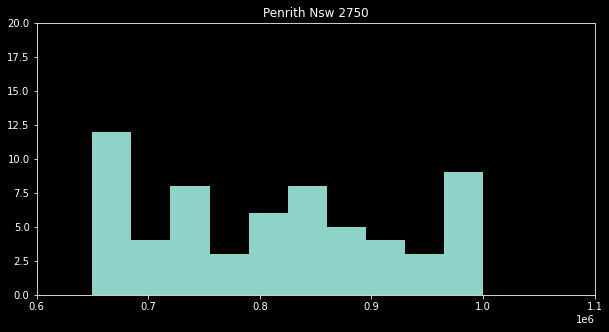

Quakers Hill Nsw 2763 :
Properties: 83 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


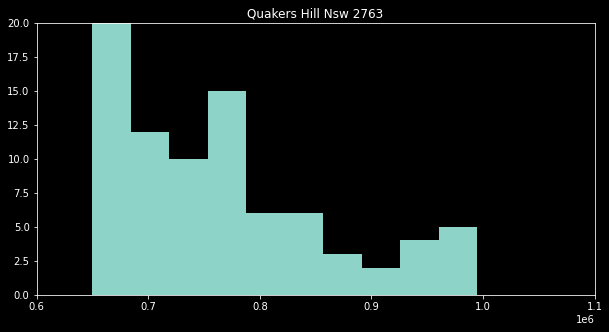

Rhodes Nsw 2138 :
Properties: 41 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


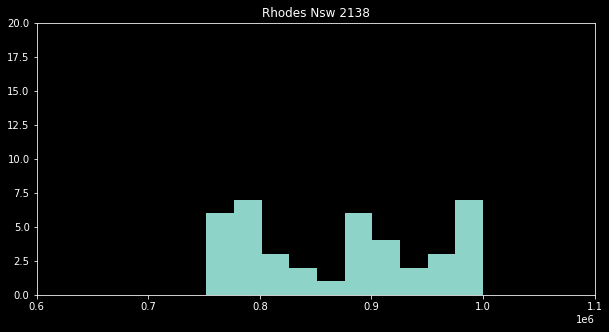

Riverstone Nsw 2765 :
Properties: 34 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


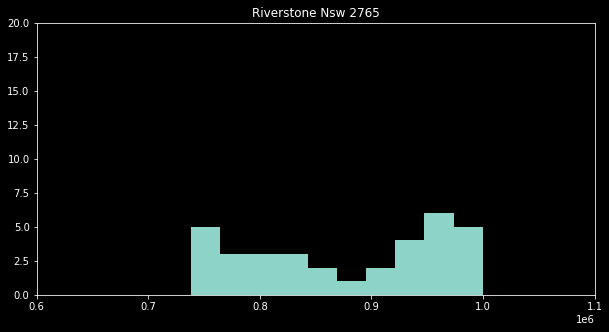

Rooty Hill Nsw 2766 :
Properties: 47 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


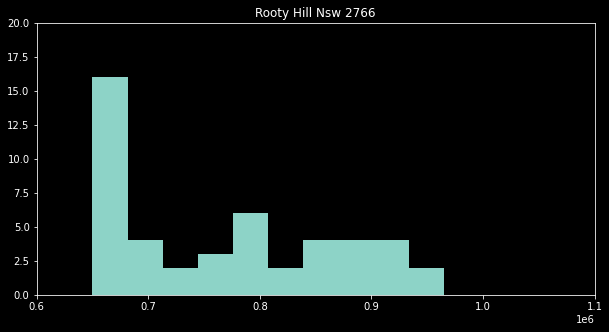

Ropes Crossing Nsw 2760 :
Properties: 37 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


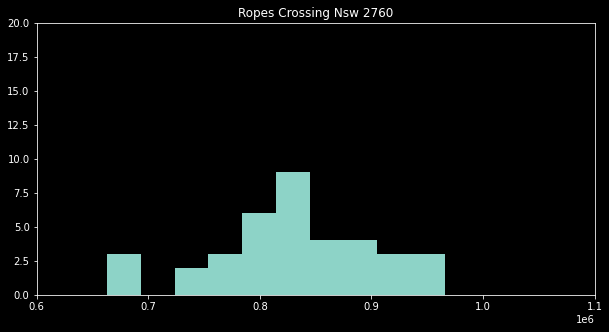

Rosebery Nsw 2018 :
Properties: 35 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


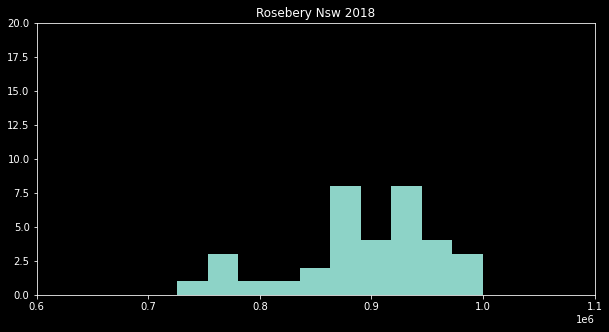

Ryde Nsw 2112 :
Properties: 51 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


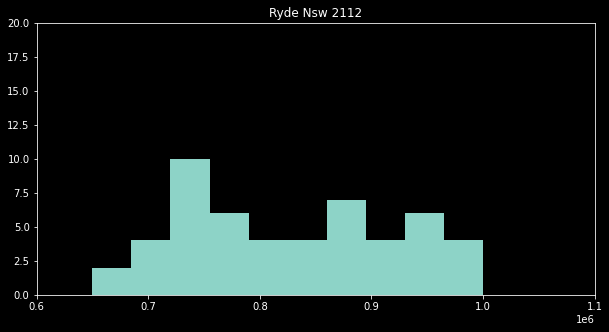

Schofields Nsw 2762 :
Properties: 38 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


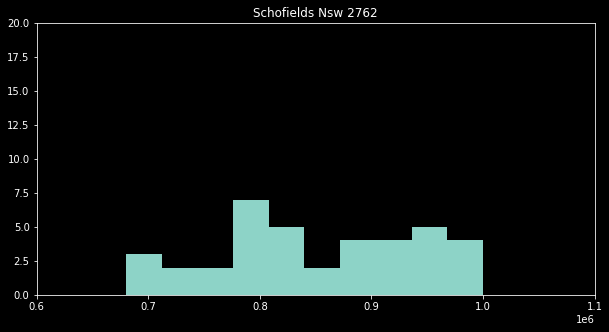

Seven Hills Nsw 2147 :
Properties: 31 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


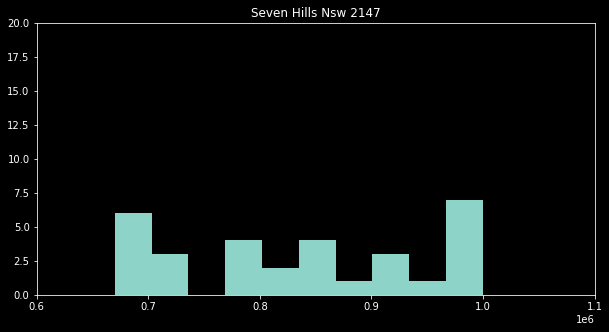

Spring Farm Nsw 2570 :
Properties: 58 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


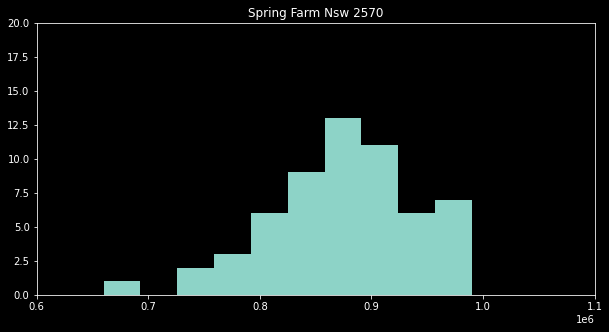

St Clair Nsw 2759 :
Properties: 29 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


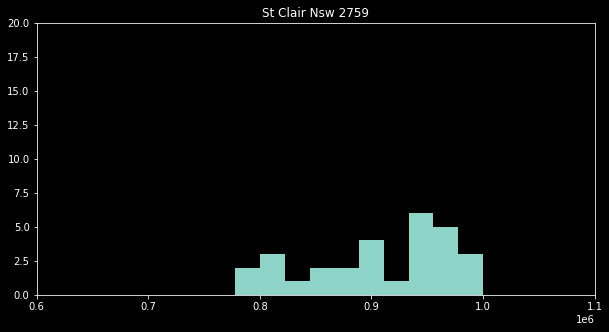

St Marys Nsw 2760 :
Properties: 50 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


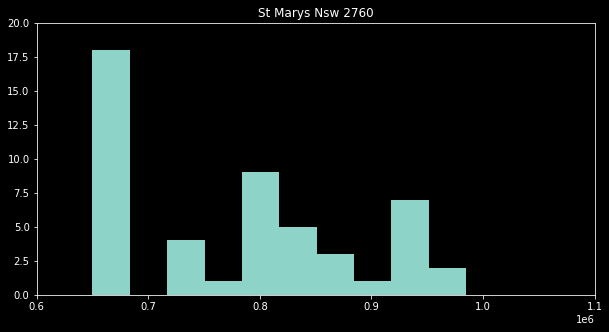

Toongabbie Nsw 2146 :
Properties: 28 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


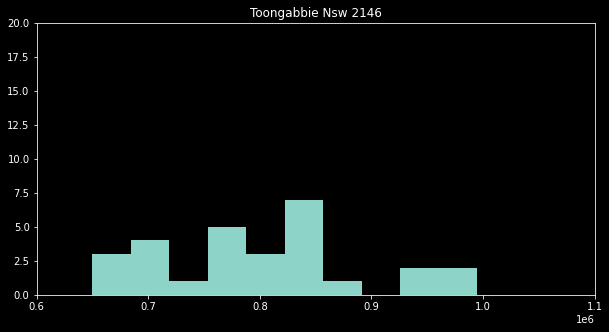

Waitara Nsw 2077 :
Properties: 33 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


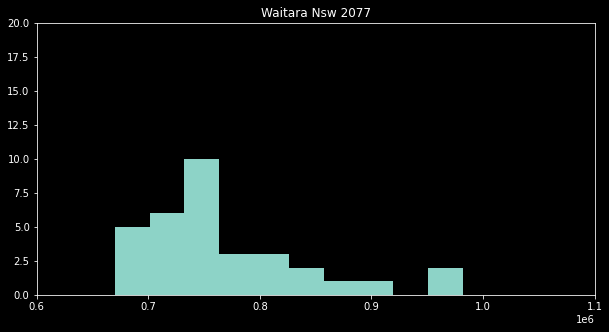

Waterloo Nsw 2017 :
Properties: 39 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


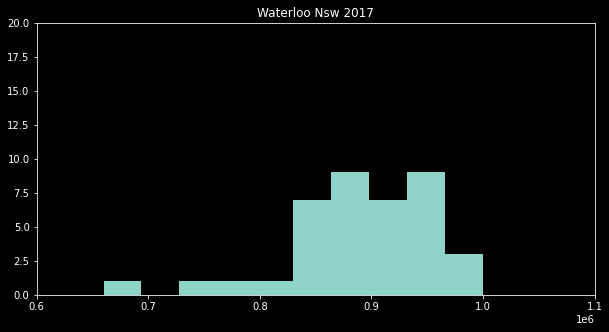

Wentworth Point Nsw 2127 :
Properties: 122 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


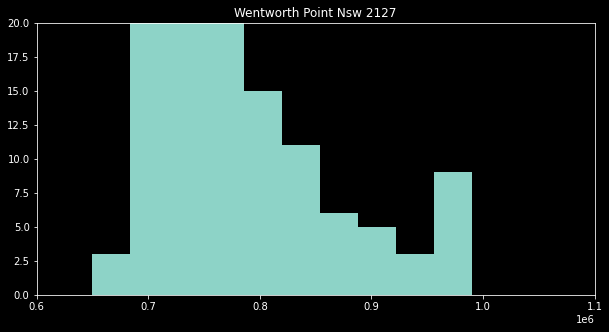

Wolli Creek Nsw 2205 :
Properties: 43 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


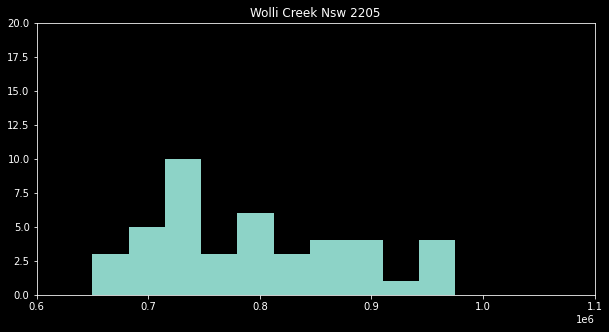

Zetland Nsw 2017 :
Properties: 33 ( 2+ bedrooms, 2+ bathrooms, budget: < 100 wan within the last, 12 months )


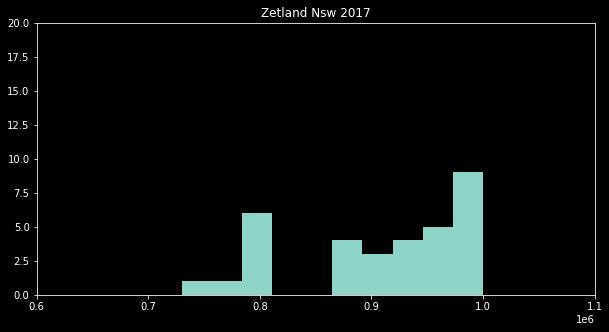

In [10]:
xlim_min = 600000
xlim_max = 1100000
ylim_max = 20

def make_hist(i):
    plt.figure(figsize=(10,5))
    plt.hist(result['Price'])
    plt.title(i)
    plt.xlim(xlim_min,xlim_max)
    plt.ylim(0,ylim_max)
    plt.show()

for place in places:
    print(place,":")
    result = properties[properties['Suburb'].str.contains(place)]
    # display(result[:1])
    print("Properties:", result.shape[0],"(",str(beds)+"+","bedrooms,",str(baths)+"+","bathrooms,","budget: <",wan_max,"wan", "within the last," ,last_months,"months",")")
    make_hist(place)

  
    